In [126]:
import xml.etree.ElementTree as ET 
import re
import seaborn as sns 

In [127]:
path = input('Chemin :\n')
if path.lower() == 'i':
    path = '/Users/admin1/Documents/deft_2009 2/data/'
else:
    path = ''

# Récupération des données de train

In [128]:
def extract_train(path):
    '''Fonction qui permet l'extraction du texte et du parti pour le corpus de train'''
    list_target =[] 
    list_text =[]
    tree= ET.parse(path)
    root= tree.getroot()
    doc= root.findall('doc')
    for doc in root.findall('doc') :
        parti= doc.find(".//PARTI")
        val= parti.get("valeur")
        list_target.append(val)

        texte = doc.find('texte')
        if texte is not None:
            textesanspar = re.sub(r'\xa0|\n|<texte>|</texte>|<p>|</p>', '', ET.tostring(texte, 'utf-8').decode('utf-8'))
            textesanspar = re.sub(r'[^\w\s\']|[0-9]', ' ', textesanspar)
            list_text.append(textesanspar) 
    return list_text, list_target

## Extraction des données du train

In [129]:
train_text_en, train_target_en = extract_train(f'{path}train/deft09_parlement_appr_en.xml')
train_text_fr, train_target_fr = extract_train(f'{path}train/deft09_parlement_appr_fr.xml')
train_text_it, train_target_it = extract_train(f'{path}train/deft09_parlement_appr_it.xml')

In [130]:
print(len(train_target_en))

19370


In [131]:
print(train_target_fr[19366])
print(train_text_fr[19366])

PPE-DE
   Monsieur le Président  Monsieur le Commissaire  chers collègues  nous sommes nombreux à avoir réclamé à plusieurs reprises la création d un Fonds européen pour les réfugiés  Il a fallu attendre les exemples éloquents du Kosovo   et dans une moindre mesure du Timor   pour que l évidence du besoin de ce fonds soit renforcée  L entrée en vigueur du traité d Amsterdam a permis d aborder sous un autre angle la politique européenne en matière d asile et d immigration  qui  comme l a déjà souligné notre collègue Oostlander  suppose une solidarité entre les États membres  et c est la raison pour laquelle il faut créer des mécanismes destinés à contribuer à atteindre un équilibre entre les efforts développés par les États membres qui accueillent ces réfugiés et ceux qui peuvent supporter  à court et à long terme  les conséquences découlant de cet accueil    Il nous semble justifié que ce Fonds contienne une composante d urgence à appliquer dans les cas de flux massif de personnes qui 

# Récupération des données de test

## Extraction du texte

In [132]:
def extract_text_test(path):
    '''Fonction qui permet l'extraction du texte pour le corpus de test'''
    liste_text=[]
    tree= ET.parse(path)
    root= tree.getroot()
    docs= root.findall('doc')
    for doc in docs:
        texte = doc.find('texte')
        if texte is not None:
            textesanspar = re.sub(r'\xa0|\n|<texte>|</texte>|<p>|</p>', '', ET.tostring(texte, 'utf-8').decode('utf-8'))
            textesanspar = re.sub(r'[^\w\s\']|[0-9]', ' ', textesanspar)
            liste_text.append(textesanspar)
    return liste_text

In [133]:
test_text_en = extract_text_test(f'{path}test/deft09_parlement_test_en.xml')
test_text_fr = extract_text_test(f'{path}test/deft09_parlement_test_fr.xml')
test_text_it = extract_text_test(f'{path}test/deft09_parlement_test_it.xml')

In [134]:
test_text_en[2601]

'    p      '

In [135]:
print(len(test_text_it))

12917


## Extraction du parti

In [136]:
def extract_train_test(path):
    '''Fonction qui permet l'extraction du parti pour le test'''
    liste_target = []
    with open(path) as file:
        for line in file:
            enliste=line.strip('\n').split('\t')
            liste_target.append(enliste[1])
    return liste_target

In [137]:
test_target_en = extract_train_test(f'{path}ref/deft09_parlement_ref_en.txt')
test_target_fr = extract_train_test(f'{path}ref/deft09_parlement_ref_fr.txt')
test_target_it = extract_train_test(f'{path}ref/deft09_parlement_ref_it.txt')

In [138]:
test_target_en[2601]

''

# Vectorisation

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import numpy as np
import pandas as pd

## Récupération des listes de stops words de Spacy


In [140]:
en = spacy.load("en_core_web_sm")
fr = spacy.load("fr_core_news_sm")
it = spacy.load("it_core_news_sm")
stopwordsen = list(en.Defaults.stop_words)
stopwordsfr = list(fr.Defaults.stop_words)
stopwordsit = list(it.Defaults.stop_words)

## Vectorisation du train et test en 1fois 

In [141]:
stopwords=[*stopwordsen,*stopwordsfr,*stopwordsit]
train_text=[*train_text_en,*train_text_fr,*train_text_it]
test_text=[*test_text_en,*test_text_fr,*test_text_it]

In [142]:
print(len(train_text))
print(train_text[58109])

58110
   Signor Presidente  intervengo per un breve commento  La relazione sulle associazioni industriali di cui sono responsabile è stata inserita all ordine del giorno di questa settimana senza che io ne sapessi nulla e soprattutto contrariamente a quanto era stato concordato tra Parlamento e autorità competenti  L ho appreso nel corso di una telefonata che ho ricevuto da un giornalista del Times di Londra  che intendeva rivolgermi alcune domande in proposito  Quando ho chiesto come fosse potuto succedere  l ufficio competente del Parlamento ha affermato che era stato fatto con il consenso dei gruppi  Quando mi sono rivolto ai gruppi  mi è stato detto che erano stati i servizi del Parlamento  Ciò non getta certo una luce positiva sul Parlamento  Ora apprendo   naturalmente con gratitudine   che la relazione può essere presentata solo con il consenso del relatore  alcuni gruppi sanno che sono ancora in corso importanti negoziati  In pratica  però  sarebbe stato molto meglio che tutto 

In [143]:
#concaténation du test et train 
full_data=[*train_text,*test_text]

In [144]:
def vectorization(data,stopWords,max_word,min_word):
    vectorizer = TfidfVectorizer(stop_words = stopWords, max_df=max_word, min_df=min_word)
    X = vectorizer.fit_transform(data)
    # Chaque mots qui apparaissent en MIN
    features = vectorizer.get_feature_names_out()
    return X, features 

In [145]:
# Vectorisation sur tout 
#X_train, features_train = vectorization(train_text,stopwords,0.9,0.001)
#X_test, festures_test =vectorization(test_text,stopwords,0.9,0.001)

data, features = vectorization(full_data,stopwords,0.9,0.001)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['gl', 'll', 'neuf', 'nient', 'qu', 'quelqu', 've'] not in stop_words.
  warnings.warn(


In [146]:
#Transformation en array, inclure panda dataframe ? 
data = data.toarray()
print(data.shape)

(96861, 15649)


In [147]:
# Split en train et test
X_train= data[:58110]
X_test= data[58110:]

# Preparation des targets

In [148]:
#Explication indices différents et textes vides 

target_labels = ["GUE-NGL", "PSE", "PPE-DE", "ELDR", "Verts-ALE"]

for indice, element in enumerate(test_target_en):
    if element not in target_labels:
        print(indice)
        

2601
12171


In [149]:
def dico(target_text):
    target=[]
    dico={'GUE-NGL':0,'PSE':1 ,'PPE-DE':2,'ELDR':3,'Verts-ALE':4, '':5}
    for parti in target_text:
        for cle,val in dico.items():
            if cle == parti:
                target.append(val)
    return np.array(target)


In [150]:
y_train=dico([*train_target_en,*train_target_fr,*train_target_it])
y_test= dico([*test_target_en,*test_target_fr,*test_target_it])

# Visualisation des données 

In [151]:
result = pd.DataFrame(
    data=X_train, 
    index=y_train,
    columns= features
)

result


,abandon,abandoned,abandonner,abattage,abbandonare,abbandonato,abbandono,abbattimento,abbreviated,abbreviato,...,événement,événements,êtes,êtres,île,îles,œil,œuvre,œuvrer,εu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


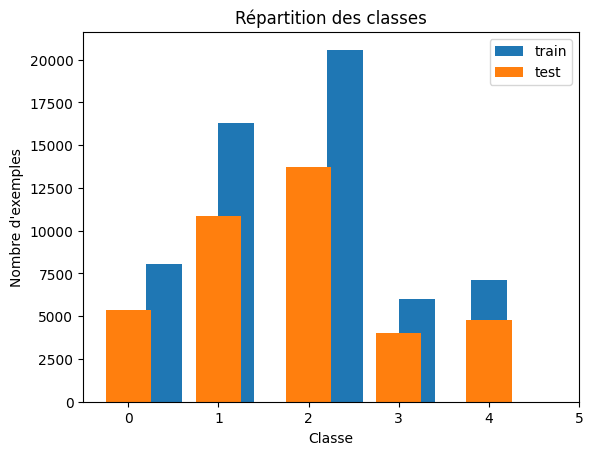

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, align="right", label="train") 
plt.hist(y_test, align="left", label="test")
plt.legend()
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.title("Répartition des classes") 
plt.show()

# Classifieurs

## SVM

In [153]:
from sklearn.svm import LinearSVC

In [154]:
clf = LinearSVC()
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [155]:
clf.predict(X_test)

array([1, 2, 4, ..., 1, 0, 4])

In [156]:
clf.score(X_test, y_test)

0.6467962117106655

In [157]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5379
           1       0.60      0.61      0.61     10881
           2       0.64      0.75      0.69     13713
           3       0.68      0.48      0.56      4017
           4       0.65      0.50      0.57      4755
           5       0.00      0.00      0.00         6

    accuracy                           0.65     38751
   macro avg       0.55      0.51      0.53     38751
weighted avg       0.65      0.65      0.64     38751



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Naive Bayes

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [159]:
MNB = MultinomialNB(alpha=0.1)
MNB.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [160]:
MNB.predict(X_test)

array([1, 2, 4, ..., 2, 0, 2])

In [161]:
y_pred = MNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53      5379
           1       0.50      0.43      0.46     10881
           2       0.46      0.85      0.60     13713
           3       0.96      0.03      0.06      4017
           4       0.63      0.10      0.17      4755
           5       0.00      0.00      0.00         6

    accuracy                           0.50     38751
   macro avg       0.54      0.31      0.30     38751
weighted avg       0.58      0.50      0.44     38751



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=100, random_state=42)
X_tsne = tsne.fit_transform(X_train)
tsne.kl_divergence_

In [ ]:
rfc =  RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
rfc.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
rfc.score(X_test, y_test)

0.3538747387164202

In [ ]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5379
           1       0.00      0.00      0.00     10881
           2       0.35      1.00      0.52     13713
           3       0.00      0.00      0.00      4017
           4       0.00      0.00      0.00      4755
           5       0.00      0.00      0.00         6

    accuracy                           0.35     38751
   macro avg       0.06      0.17      0.09     38751
weighted avg       0.13      0.35      0.18     38751



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.